# Entanglement Distribution by Quantum Repeaters: Exploration by Quantum Monte Carlo Simulation 

## MIT 6.2140 | S2023

### Introductory Note

Hi Everyone, 

In 6.2140, we explored quantum communication protocols, such as quantum key distribution, which rely on photonic qubits for secure information exchange. However, as we discovered, the scalability of photon-only schemes is limited due to factors such as loss and noise in optical channels. While there are proposals for photonic error-correcting methods[1–3], they are not yet technologically feasible. 
Memory-based quantum repeaters are devices that enable long-distance quantum communication by extending the of entanglement of stationary qubits beyond what is achievable using direct optical transmission. These devices work by dividing a long-distance channel into shorter segments of quantum memories with optical interfaces, creating entanglement between adjacent segments, and then "swapping" the entanglement to form longer-range connections. Among the leading approaches to quantum repeaters are those based on atomic ensembles, trapped ions, and solid-state qubits. Presently, solid-state qubits have achieved the largest number of entangled nodes, which at this point is still just 3. See here for background[4]. 

This is a rapidly evolving field of research, making it impractical to include a physical laboratory module in the course. Nevertheless, quantum repeaters are an essential concept for envisioned quantum networks, such as the "quantum internet" and the scaling of quantum computers through the networking of modular quantum information processors. To provide you with hands-on experience with quantum repeaters, we have developed a simulator based on the Quantum Monte Carlo method, implemented in QuTiP/Python.
The simulator models entanglement of electron spins in atom-like solid-state emitters, making use of optically heralded photon-photon gates. This interactive tool will allow you to explore the behavior of quantum repeaters and understand their significance in the context of quantum communication networks.  

We encourage you to experiment with the simulator and gain a deeper understanding of quantum repeaters and their potential impact on the future of quantum communication and computation. Feel free to leverage this code for any final projects concerning quantum communication or perhaps quantum computing (for the latter, you could see references here[5–8] on how such entanglement distribution methods could be used for distributed / modular quantum computing).

Incidentally, I created a bare-bones simulator of a particular approach to quantum computing called cluster-state quantum computing here [9]

Best regards, 
Dirk

[1]	M. Pant, H. Krovi, D. Englund, and S. Guha, Rate-Distance Tradeoff and Resource Costs for All-Optical Quantum Repeaters, Phys. Rev. A (2017).

\[2]	K. Azuma, K. Tamaki, and H.-K. Lo, All-Photonic Quantum Repeaters, Nat. Commun. 6, 6787 (2015).

\[3]	G. R. Steinbrecher, J. P. Olson, D. Englund, and J. Carolan, Quantum Optical Neural Networks, Npj Quantum Information 5, 1 (2019).

\[4]	M. Ruf, N. H. Wan, H. Choi, and D. Englund, Quantum Networks Based on Color Centers in Diamond, Journal of Applied (2021).

\[5]	C. Monroe, R. Raussendorf, A. Ruthven, K. R. Brown, P. Maunz, L.-M. Duan, and J. Kim, Large-Scale Modular Quantum-Computer Architecture with Atomic Memory and Photonic Interconnects, Phys. Rev. A 89, 022317 (2014).

\[6]	H. Choi, M. Pant, S. Guha, and D. Englund, Percolation-Based Architecture for Cluster State Creation Using Photon-Mediated Entanglement between Atomic Memories, Npj Quantum Inf. 5, (2019).

\[7]	Y. Li, P. C. Humphreys, G. J. Mendoza, and S. C. Benjamin, Resource Costs for Fault-Tolerant Linear Optical Quantum Computing, Phys. Rev. X 5, 041007 (2015).

\[8]	K. Nemoto, M. Trupke, S. J. Devitt, A. M. Stephens, B. Scharfenberger, K. Buczak, T. Nöbauer, M. S. Everitt, J. Schmiedmayer, and W. J. Munro, Photonic Architecture for Scalable Quantum Information Processing in Diamond, Phys. Rev. X 4, 031022 (2014)

\[9] https://colab.research.google.com/drive/1cFFPAnHR1VRqbXpMx21s0e6lhbt_4VuK#scrollTo=46rQJduPHFKk&uniqifier=1 

## Simulation

*The following code was creeated by Bo-Han Wu and Dirk Englund.*

Before we start, please install the QuTip package.

---



In [1]:
!pip install qutip
from qutip import *
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
from IPython.display import Image

# Generation of spin-photon entangled pair


Based on the spin-photon entanglement result, we would like to develope the protocol to entangle the two spin systems. To start with, let's prepare two copies of spin-photon systems.

In a single spin-photon system, we consider the transition diagram of a NV system as shown in the following figure. Initially, we prepare the initial state as the equally suerposition state as:

$$|\psi_0\rangle=\frac{1}{\sqrt{2}}\left(|g_{\downarrow}\rangle+|g_{\uparrow}\rangle\right)\otimes|0\rangle$$ and send the optical field, whose Rabi frequency is $\Omega$ and is resonant to the frequency between the transition $|g_\downarrow\rangle\rightarrow|e_{\downarrow}\rangle$, to the NV system. The interaction Hamiltonian can be written as: $$\hat{H}/\hbar=\Omega\left(\hat{a}\sigma^{\downarrow}_{+}+\hat{a}\sigma^{\uparrow}_{+}e^{i\Delta t}\right)+\text{h.c.}$$
, where $\sigma^{\downarrow(\uparrow)}_{+}=|e_{\downarrow(\uparrow)}\rangle\langle g_{\downarrow(\uparrow)}|$, with the excitation time-dependent Hamiltonian that uses the Semi-classical approximation: $$\hat{H}_{\text{excited}}\left(t\right)/\hbar=P\left(t\right)\left\{\sigma^{\downarrow}_{+}+\sigma^{\uparrow}_{+}e^{i\Delta t}\right\}+\text{h.c.}$$
, where $P\left(t\right)$ is the Rabi frequency of the excitation pulse. $\Delta$ is the detunning frequency, illustrated in the figure.

In [ ]:
uploaded = files.upload()

Saving Spin_Spin_Transition_Diagram.001.jpeg to Spin_Spin_Transition_Diagram.001 (1).jpeg


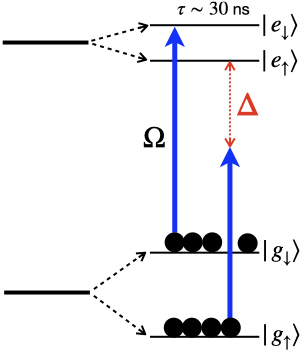

In [ ]:
Image('Spin_Spin_Transition_Diagram.001 (1).jpeg')

Here is the code of system A that generates the entangled spin-photon pair.

In [ ]:
Na = 4 # number of atomic levels
ground_down = basis(Na, 0)
ground_up = basis(Na, 1)
excited_down = basis(Na, 2)
excited_up = basis(Na, 3)

N = 10 # Set where to truncate Fock state for cavity
sigma_A_gd_ed = tensor(qeye(N), ground_down * excited_down.dag()) # |g_down><e_down| of mode A
sigma_A_gu_eu = tensor(qeye(N), ground_up * excited_up.dag()) # |g_up><e_up| of mode A

a_A = tensor(destroy(N), qeye(Na)) # annihiliation occurs at mode A

### Let's define collapse operators
c_ops = [] # Build collapse operators

kappa =1 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a_A) # Cavity decay at mode A

gamma = 1 # Atomic decay rate
c_ops.append(np.sqrt(gamma) * sigma_A_gd_ed) # sponenteous decay from |e_down> to |g_down>
c_ops.append(np.sqrt(gamma) * sigma_A_gu_eu) # sponenteous decay from |e_up> to |g_up>


# e_ops=[a_A.dag()*a_A, sigma_A_gd_ed*sigma_A_gd_ed.dag(), sigma_A_gd_ed.dag()*sigma_A_gd_ed, sigma_A_gu_eu*sigma_A_gu_eu.dag(), sigma_A_gu_eu.dag()*sigma_A_gu_eu]

time_scale=2000
t = np.linspace(0.0, 8.0, time_scale) # Define time vector
psi0 = tensor(basis(N, 0), ground_down/np.sqrt(2)+ground_up/np.sqrt(2)) # Define initial state as the superposition state of |g_down> and |g_up>


Delta_freq=1.4e9 # Frequency difference between |e_down> and |e_up>
life_time_ed=30e-9 # lifetime of |e_down>
Delta=Delta_freq*life_time_ed  #Detunning normalized to spontaneous decay rate of |e_down>
Omega = 2 # coupling strength (Rabi frequency0)
# Here describes the interaction Hamiltonian
H0 = -Omega * (sigma_A_gd_ed.dag() * a_A+a_A.dag()* sigma_A_gd_ed) # time-independent Hermitian
H1_1 = -Omega * (sigma_A_gu_eu.dag() * a_A )# the time-dependent Hamiltonian that couples |g_up> and |e_up> with detunning \Delta
H1_2 = -Omega * ( a_A.dag()* sigma_A_gu_eu)# the time-dependent Hamiltonian that couples |e_up> and |g_up> with detunning \Delta

# Here describes the excitation Hamiltonian
H1_3 = (sigma_A_gd_ed.dag() + sigma_A_gd_ed) # time-dependent Hamiltonian after semi-classical approximation for spin down
H_exc_1 = (sigma_A_gu_eu.dag()) # time-dependent excitation Hamiltonian that couples |g_up> and |e_up> with zero detunning
H_exc_2 = (sigma_A_gu_eu) # the time-dependent excitation Hamiltonian that couples |e_up> and |g_up> with detunning \Delta


times = t

numb=400 # numbers of trajectories
ntraj=[numb]

# Excitation pulse parameters
peak =21
center=0.3
life_time=0.05

excite_pulse = peak * np.exp(-((t-center) / life_time) ** 2)
excite_pulse_nor = excite_pulse/peak

H_A = [H0,[H1_1,np.exp(1j*Delta*t)],[H1_2,np.exp(-1j*Delta*t)],[H1_3, excite_pulse],[H_exc_1, np.exp(1j*Delta*t)*excite_pulse],[H_exc_2, np.exp(-1j*Delta*t)*excite_pulse]]
output_A = mcsolve(H_A, psi0, times, c_ops, [], ntraj)

10.0%. Run time:   4.73s. Est. time left: 00:00:00:42
20.0%. Run time:   7.29s. Est. time left: 00:00:00:29
30.0%. Run time:   9.73s. Est. time left: 00:00:00:22
40.0%. Run time:  12.21s. Est. time left: 00:00:00:18
50.0%. Run time:  14.68s. Est. time left: 00:00:00:14
60.0%. Run time:  18.59s. Est. time left: 00:00:00:12
70.0%. Run time:  21.04s. Est. time left: 00:00:00:09
80.0%. Run time:  23.52s. Est. time left: 00:00:00:05
90.0%. Run time:  26.01s. Est. time left: 00:00:00:02
100.0%. Run time:  29.29s. Est. time left: 00:00:00:00
Total run time:  29.48s


Here is the second copy B.

In [ ]:
sigma_B_gd_ed = tensor(qeye(N), ground_down * excited_down.dag()) # |g_down><e_down| of mode A
sigma_B_gu_eu = tensor(qeye(N), ground_up * excited_up.dag()) # |g_up><e_up| of mode A

a_B = tensor(destroy(N), qeye(Na)) # annihiliation occurs at mode A

### Let's define collapse operators
c_ops = [] # Build collapse operators

kappa =1 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a_B) # Cavity decay at mode A

gamma = 1 # Atomic decay rate
c_ops.append(np.sqrt(gamma) * sigma_B_gd_ed) # sponenteous decay from |e_down> to |g_down>
c_ops.append(np.sqrt(gamma) * sigma_B_gu_eu) # sponenteous decay from |e_up> to |g_up>


# e_ops=[a_B.dag()*a_B, sigma_B_gd_ed*sigma_B_gd_ed.dag(), sigma_B_gd_ed.dag()*sigma_B_gd_ed, sigma_B_gu_eu*sigma_B_gu_eu.dag(), sigma_B_gu_eu.dag()*sigma_B_gu_eu]

time_scale=2000
t = np.linspace(0.0, 8.0, time_scale) # Define time vector
psi0 = tensor(basis(N, 0), ground_down/np.sqrt(2)+ground_up/np.sqrt(2)) # Define initial state as the superposition state of |g_down> and |g_up>

Delta_freq=1.4e9 # Frequency difference between |e_down> and |e_up>
life_time_ed=30e-9 # lifetime of |e_down>
Delta=Delta_freq*life_time_ed  #Detunning normalized to spontaneous decay rate of |e_down>
Omega = 2 # coupling strength (Rabi frequency0)
# Here describes the interaction Hamiltonian
H0 = -Omega * (sigma_B_gd_ed.dag() * a_B+a_B.dag()* sigma_B_gd_ed) # time-independent Hermitian
H1_1 = -Omega * (sigma_B_gu_eu.dag() * a_B)# the time-dependent Hamiltonian that couples |g_up> and |e_up> with detunning \Delta
H1_2 = -Omega * ( a_B.dag()* sigma_B_gu_eu)# the time-dependent Hamiltonian that couples |e_up> and |g_up> with detunning \Delta

# Here describes the excitation Hamiltonian
H1_3 = (sigma_B_gd_ed.dag() + sigma_B_gd_ed) # time-dependent Hamiltonian after semi-classical approximation for spin down
H_exc_1 = (sigma_B_gu_eu.dag()) # time-dependent excitation Hamiltonian that couples |g_up> and |e_up> with zero detunning
H_exc_2 = (sigma_B_gu_eu) # the time-dependent excitation Hamiltonian that couples |e_up> and |g_up> with detunning \Delta


times = t

# Excitation pulse parameters
peak =21
center=0.3
life_time=0.05

excite_pulse = peak * np.exp(-((t-center) / life_time) ** 2)
excite_pulse_nor = excite_pulse/peak

H_B = [H0,[H1_1,np.exp(1j*Delta*t)],[H1_2,np.exp(-1j*Delta*t)],[H1_3, excite_pulse],[H_exc_1, np.exp(1j*Delta*t)*excite_pulse],[H_exc_2, np.exp(-1j*Delta*t)*excite_pulse]]
output_B = mcsolve(H_B, psi0, times, c_ops, [], ntraj)

10.0%. Run time:   2.66s. Est. time left: 00:00:00:23
20.0%. Run time:   7.17s. Est. time left: 00:00:00:28
30.0%. Run time:  11.86s. Est. time left: 00:00:00:27
40.0%. Run time:  14.34s. Est. time left: 00:00:00:21
50.0%. Run time:  16.82s. Est. time left: 00:00:00:16
60.0%. Run time:  19.83s. Est. time left: 00:00:00:13
70.0%. Run time:  23.17s. Est. time left: 00:00:00:09
80.0%. Run time:  25.63s. Est. time left: 00:00:00:06
90.0%. Run time:  28.15s. Est. time left: 00:00:00:03
100.0%. Run time:  30.65s. Est. time left: 00:00:00:00
Total run time:  30.79s


#Generation of spin-spin entangled pair

Here, let's do the Bell state measurement to swap the entanglement. The Bell state measurement can be thought of as the projection operator, acted on the two spin systems A and B. In Monte Carlo simulation, we acquire a bunch of states that experience a number of quantum jumps and only count those events that either one of the detectors fire (detector A or B) and discard the rest of events. "Passing the two photon of A and B through a 50/50 beamsplitter" plus "the conditional measurement on either one of the detectors fire" is equivalent to project the overall state onto the Bell states $|\Psi_\pm\rangle=\left(|1_A\rangle|0_B\rangle\pm|0_A\rangle|1_B\rangle\right)/\sqrt{2}$. The scheme can be plotted in the following figure.

In [ ]:
uploaded = files.upload()

Saving BSM.001.jpeg to BSM.001.jpeg


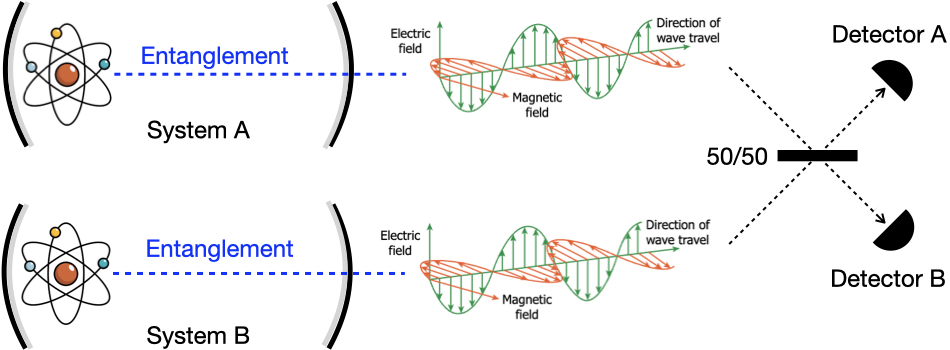

In [ ]:
Image('BSM.001.jpeg')

In [ ]:
init=[tensor(output_A.states[i][time_scale-1],output_B.states[i][time_scale-1]) for i in range(numb)] #define the initial state of system A and B that are both in stationary states

# Condition on the measurement of either one of the photo detector fires
C1=tensor(basis(N,0),qeye(Na),basis(N,1),qeye(Na))/np.sqrt(2)+tensor(basis(N,1),qeye(Na),basis(N,0),qeye(Na))/np.sqrt(2) #basis of |01>+|10>
C2=tensor(basis(N,0),qeye(Na),basis(N,1),qeye(Na))/np.sqrt(2)-tensor(basis(N,1),qeye(Na),basis(N,0),qeye(Na))/np.sqrt(2) #basis of |01>-|10>
# We have to consider C1 and C2 at the same time because we cannot differentiate them

# Discarding the events other than |01>+|10> and |01>-|10> decreases the overall entanglement

measurement_set=[C1,C2]

# Executing the conditional measurement on all trajectories
measured_state=[M.dag()*init[j] for j in range(numb) for M in measurement_set]

Great! Now, let's take a look at the entanglement entropy. The entanglement is to quantify the entanglement between a bipartite system and can be calculated by the Von-Neuman entropy of the reduced densiy operator $\hat{\rho}_A=\text{Tr}_B\left[\hat{\rho}_{AB}\right]$ or $\hat{\rho}_B=\text{Tr}_A\left[\hat{\rho}_{AB}\right]$. Since that the property of entanglement is the information shared in between A and B and the measurement itself will loss the bonding of the two systems and causing it to be a mixed state. The Von-Neumann entropy calculation of the mixed state quantifies the amount of information that was lost during measurement.

First of all, let's take the ensemble average of the overall output states to get the ensemble averaged density operator. Followed by the definition of entanglement entropy, we can calculate the overall entanglement between spin A and B.

In [ ]:
psi=0*tensor(ground_down * excited_down.dag(), ground_down * excited_down.dag()) # Construct the density operator with desired rank
d=len(measured_state)

# this part aims to take the ensemble average of all possible states
for j in range(0,d):
        psi+=qt.ket2dm(measured_state[j])
out=psi/d
out=out/np.trace(out)

# Eventually, we calculate the entanglement entropy of the two spin systems
print('The entanglement between two spins after swapping is',(entropy_vn(out.ptrace(1),2)+entropy_vn(out.ptrace(0),2))/2)

# entropy_vn(out.ptrace(1),2) and entropy_vn(out.ptrace(2),2) should be identical as the number of trajectories goes to infinity

The entanglement between two spins after swapping is 0.851180802720258
